In [538]:
import random

import agentpy as ap


class Pessoa(ap.Agent):
    def setup(self):
        self.rng = self.model.random

        self.opinion = random.choice([0, 1, 2])
        self.resistance = self.rng.random()
        self.influencer = False
        self.vizinhos = None

    def send_message(self, receiver, performative, content):
          message = {
              'performative': performative,
              'sender': self,
              'receiver': receiver,
              'content': content
          }
          receiver.receive_message(message)

    def receive_message(self, message):
        if message['performative'] == 'inform':
          self.process_message(message)

    def process_message(self, message):
        other_opinion = message["content"]

        if self.opinion != other_opinion:
          
            if self.rng.random() <= (1 - self.resistance):
                    self.opinion = other_opinion



In [539]:
import networkx as nx


class SocialModel(ap.Model):
    def setup(self):
        self.agents = ap.AgentList(self,  self.p.population, Pessoa)
        inf_qty = int(self.p.influencer_per * self.p.population)
        inf_agents = self.agents.random(inf_qty)

        inf_agents.influencer = True
        inf_agents.resistance = 0.9

        degrees = np.random.randint(1, 10, size=self.p.population) 

        #aleatorio
        
        # graph = nx.erdos_renyi_graph(
        #     self.p.population, 
        #     0.2, 
        #     42
        # )


        for i, agent in enumerate(self.agents):
            if agent.influencer:
                degrees[i] = int(self.p.population / 3)

        if sum(degrees) % 2 != 0:
            degrees[np.random.randint(0, self.p.population)] += 1

        graph = nx.configuration_model(degrees)  
        graph = nx.Graph(graph) 
        graph.remove_edges_from(nx.selfloop_edges(graph))

        self.network = self.agents.network = ap.Network(self, graph)
        self.network.add_agents(self.agents, self.network.nodes)

        for agent in self.agents:
            agent.vizinhos = len(list(self.network.neighbors(agent)))

    def step(self):
        # Atualize todos os agentes
        for agent in self.agents:
            for other_agent in self.network.neighbors(agent):
                agent.send_message(receiver = other_agent, performative = "inform", content = agent.opinion)

                


In [540]:
parameters = {  
    'population': 50,
    'steps': 20,
    'influencer_per': 0.01,
}

In [541]:
modelo = SocialModel(parameters)

In [542]:
results = modelo.run()

Completed: 20 steps
Run time: 0:00:00.015707
Simulation finished


In [543]:
import matplotlib.pyplot as plt


def animation_plot(m, ax):

    ax.set_title("Animacao")
    
    
    # Plot network on second axis
    color_dict = {0:'b', 1:'r', 2:'g'}
    colors = [color_dict[c] for c in m.agents.opinion]
    sizes = [s * 10 for s in m.agents.vizinhos]
    nx.draw_kamada_kawai(m.network.graph, node_color=colors, node_size=sizes, ax=ax)
    # nx.draw_circular(m.network.graph, node_color=colors, node_size=sizes, ax=ax)

fig, axs = plt.subplots(1, 1, figsize=(8, 4)) # Prepare figure 
animation = ap.animate(SocialModel(parameters), fig, axs, animation_plot)

In [544]:
import IPython

IPython.display.HTML(animation.to_jshtml()) 

In [487]:
import numpy as np
from scipy.stats import powerlaw

alpha = 2  
size = 100

random_numbers = powerlaw.rvs(alpha, size=size)
int_numbers = np.floor(random_numbers * 10).astype(int)


print(list(int_numbers))


[1, 6, 5, 3, 4, 8, 5, 8, 9, 2, 8, 9, 9, 5, 6, 3, 4, 5, 8, 4, 6, 9, 8, 7, 8, 3, 5, 8, 9, 8, 9, 9, 7, 8, 7, 2, 2, 6, 8, 4, 7, 6, 9, 8, 8, 7, 8, 6, 7, 5, 2, 6, 7, 7, 3, 6, 4, 8, 8, 8, 2, 5, 8, 4, 3, 8, 8, 8, 8, 7, 4, 9, 9, 8, 8, 7, 7, 9, 6, 8, 4, 9, 4, 9, 6, 5, 7, 5, 7, 8, 3, 4, 8, 1, 5, 8, 6, 6, 4, 5]


In [488]:
# random_numbers

In [489]:
a = powerlaw.rvs(0.5, size=1000) 

<Axes: ylabel='Count'>

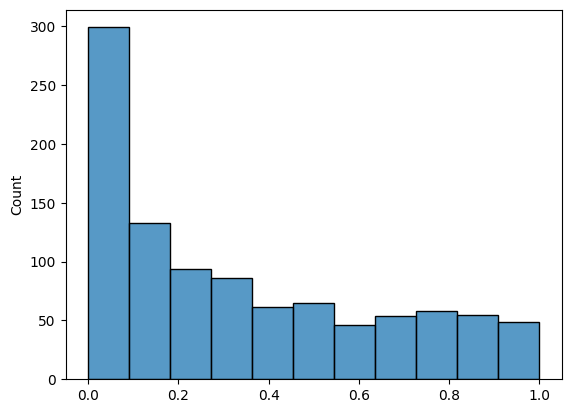

In [490]:
import seaborn as sns

sns.histplot(a)